In [92]:

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



## Load the data you receive into a Pandas DataFrame

In [93]:
df= pd.read_csv('./data-fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Show the first five rows of the data set.

In [94]:
first_five_rows=df.head(5)
first_five_rows

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



## Show the description and the info of the data set

In [95]:

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [97]:
df.shape

(159, 7)

In [98]:

y=df['Height'].values
y

array([11.52  , 12.48  , 12.3778, 12.73  , 12.444 , 13.6024, 14.1795,
       12.67  , 14.0049, 14.2266, 14.2628, 14.3714, 13.7592, 13.9129,
       14.9544, 15.438 , 14.8604, 14.938 , 15.633 , 14.4738, 15.1285,
       15.9936, 15.5227, 15.4686, 16.2405, 16.36  , 16.3618, 16.517 ,
       16.8896, 18.957 , 18.0369, 18.084 , 18.7542, 18.6354, 17.6235,
        4.1472,  5.2983,  5.5756,  5.6166,  6.216 ,  6.4752,  6.1677,
        6.1146,  5.8045,  6.6339,  7.0334,  6.55  ,  6.4   ,  7.5344,
        6.9153,  7.3968,  7.0866,  8.8768,  8.568 ,  9.485 ,  8.3804,
        8.1454,  8.778 , 10.744 , 11.7612, 12.354 ,  6.8475,  6.5772,
        7.4052,  8.3922,  8.8928,  8.5376,  9.396 ,  9.7364, 10.3458,
       11.088 , 11.368 ,  2.112 ,  3.528 ,  3.824 ,  4.5924,  4.588 ,
        5.2224,  5.1992,  5.6358,  5.1376,  5.082 ,  5.6925,  5.9175,
        5.6925,  6.384 ,  6.11  ,  5.64  ,  6.11  ,  5.875 ,  5.5225,
        5.856 ,  6.792 ,  5.9532,  5.2185,  6.275 ,  7.293 ,  6.375 ,
        6.7334,  6.4

In [99]:

X=df['Width'].values
X

array([4.02  , 4.3056, 4.6961, 4.4555, 5.134 , 4.9274, 5.2785, 4.69  ,
       4.8438, 4.9594, 5.1042, 4.8146, 4.368 , 5.0728, 5.1708, 5.58  ,
       5.2854, 5.1975, 5.1338, 5.7276, 5.5695, 5.3704, 5.2801, 6.1306,
       5.589 , 6.0532, 6.09  , 5.8515, 6.1984, 6.603 , 6.3063, 6.292 ,
       6.7497, 6.7473, 6.3705, 2.268 , 2.8217, 2.9044, 3.1746, 3.5742,
       3.3516, 3.3957, 3.2943, 3.7544, 3.5478, 3.8203, 3.325 , 3.8   ,
       3.8352, 3.6312, 4.1272, 3.906 , 4.4968, 4.7736, 5.355 , 4.2476,
       4.2485, 4.6816, 6.562 , 6.5736, 6.525 , 2.3265, 2.3142, 2.673 ,
       2.9181, 3.2928, 3.2944, 3.4104, 3.1571, 3.6636, 4.144 , 4.234 ,
       1.408 , 1.9992, 2.432 , 2.6316, 2.9415, 3.3216, 3.1234, 3.0502,
       3.0368, 2.772 , 3.555 , 3.3075, 3.6675, 3.534 , 3.4075, 3.525 ,
       3.525 , 3.525 , 3.995 , 3.624 , 3.624 , 3.63  , 3.626 , 3.725 ,
       3.723 , 3.825 , 4.1658, 3.6835, 4.239 , 4.144 , 5.1373, 4.335 ,
       4.335 , 4.5662, 4.2042, 4.6354, 4.7716, 6.018 , 6.3875, 7.7957,
      

In [100]:
X=X.reshape(-1,1)
X

array([[4.02  ],
       [4.3056],
       [4.6961],
       [4.4555],
       [5.134 ],
       [4.9274],
       [5.2785],
       [4.69  ],
       [4.8438],
       [4.9594],
       [5.1042],
       [4.8146],
       [4.368 ],
       [5.0728],
       [5.1708],
       [5.58  ],
       [5.2854],
       [5.1975],
       [5.1338],
       [5.7276],
       [5.5695],
       [5.3704],
       [5.2801],
       [6.1306],
       [5.589 ],
       [6.0532],
       [6.09  ],
       [5.8515],
       [6.1984],
       [6.603 ],
       [6.3063],
       [6.292 ],
       [6.7497],
       [6.7473],
       [6.3705],
       [2.268 ],
       [2.8217],
       [2.9044],
       [3.1746],
       [3.5742],
       [3.3516],
       [3.3957],
       [3.2943],
       [3.7544],
       [3.5478],
       [3.8203],
       [3.325 ],
       [3.8   ],
       [3.8352],
       [3.6312],
       [4.1272],
       [3.906 ],
       [4.4968],
       [4.7736],
       [5.355 ],
       [4.2476],
       [4.2485],
       [4.6816],
       [6.562 

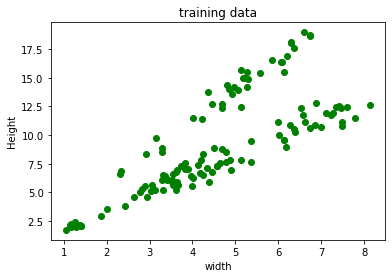

In [101]:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
plt.scatter(x_train,y_train , color = 'green')
plt.title('training data')
plt.xlabel('width')
plt.ylabel('Height')
plt.show()

In [102]:

model = LinearRegression()
model.fit(x_train,x_train)

LinearRegression()

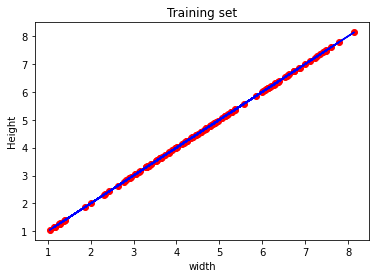

In [103]:

plt.scatter(x_train, x_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Training set')
plt.xlabel('width')
plt.ylabel('Height')
plt.show()

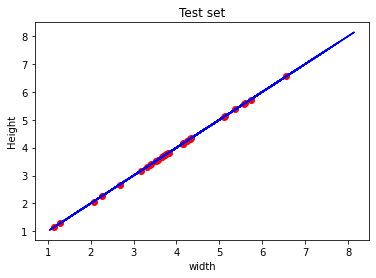

In [104]:
plt.scatter(x_test, x_test, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Test set')
plt.xlabel('width')
plt.ylabel('Height')
plt.show()

In [105]:

from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))*100

-77.85933043233315